**Librerías y Carga de archivos**

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tabulate import tabulate
from sklearn.decomposition import PCA

breast_cancer_dataset = pd.read_csv('Breast_cancer_dataset.csv')
cancer_mean = pd.read_csv('breast_cancer_mean.csv')
cancer_se = pd.read_csv('breast_cancer_se.csv')
cancer_worst = pd.read_csv('breast_cancer_worst.csv')


print(cancer_mean.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 53.5+ KB
None


**Matríz de Correlación de Características**

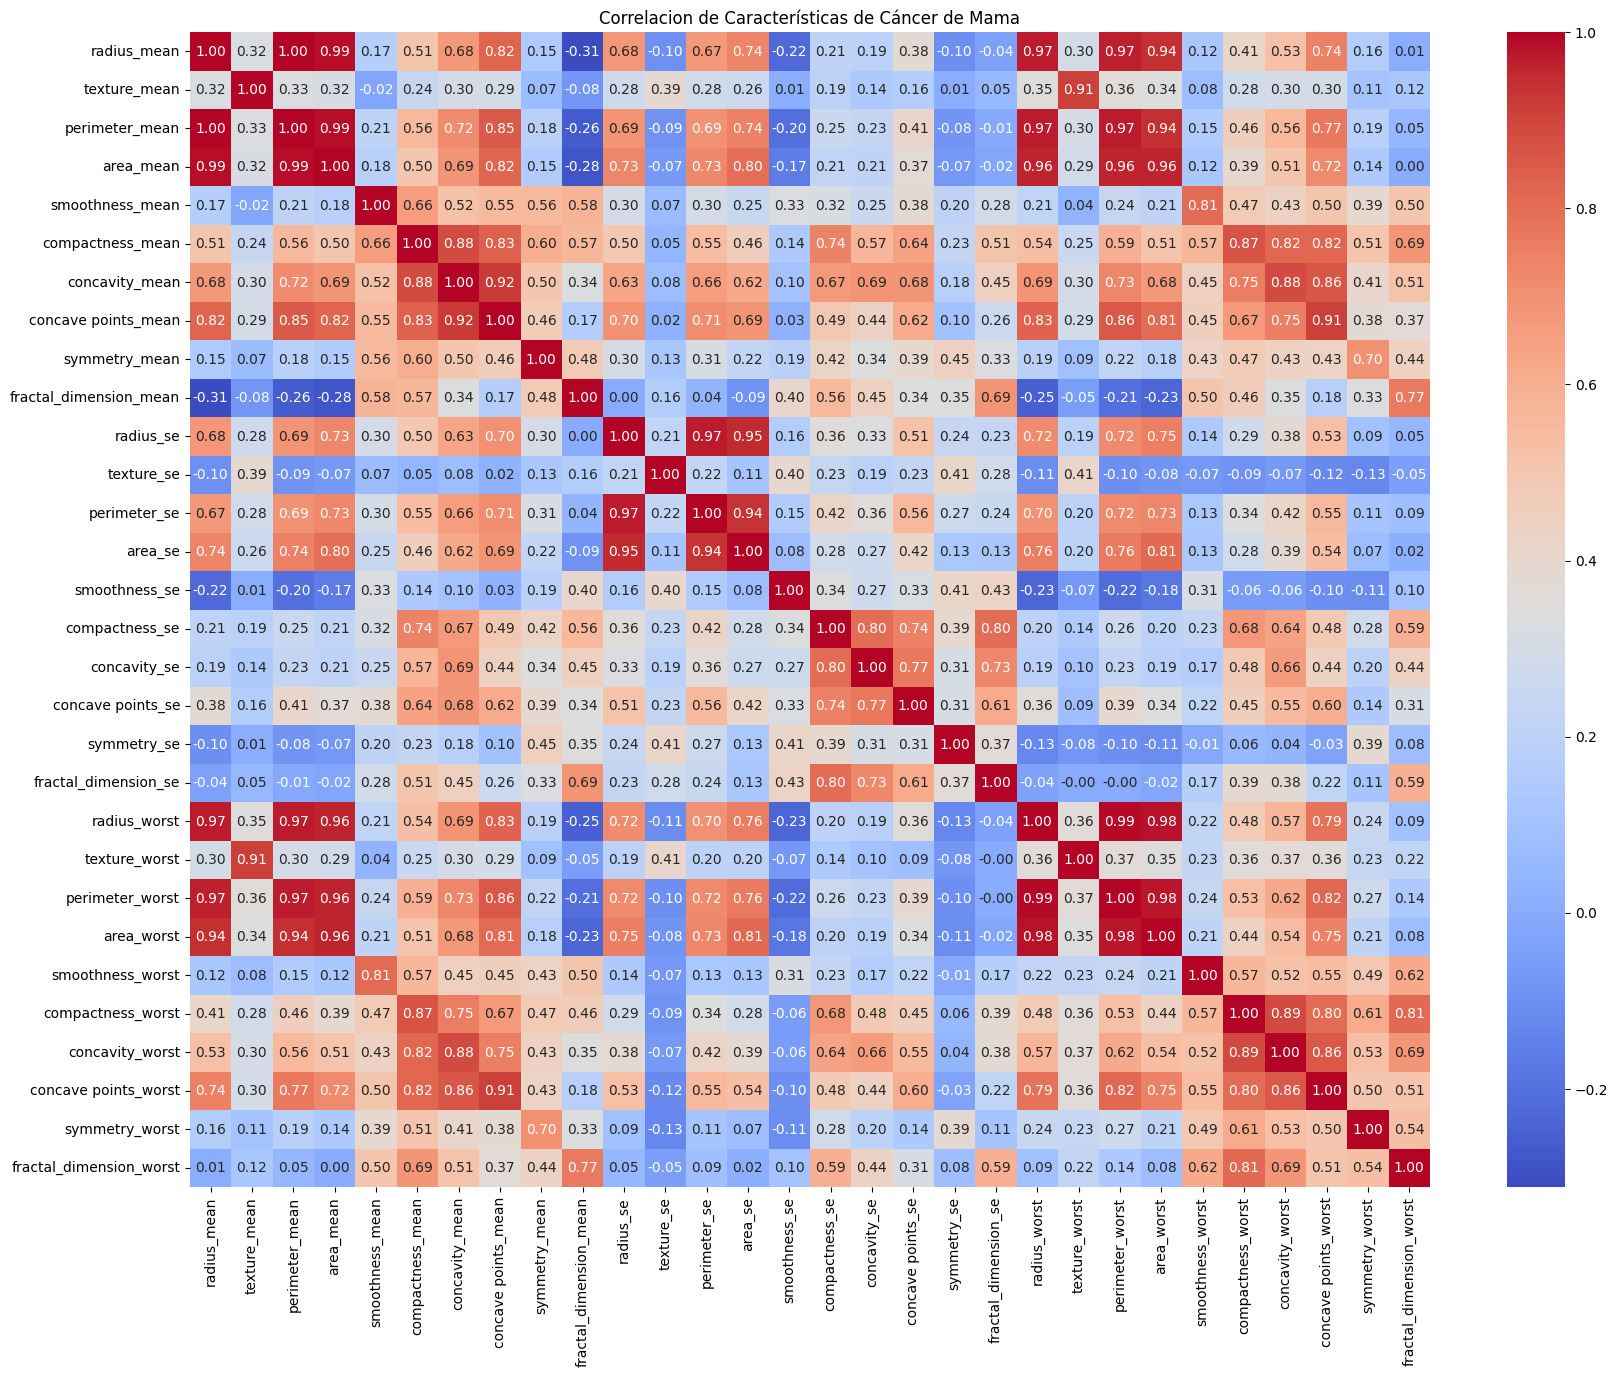

In [125]:
# Eliminación de la columna irrelevante 'Unnamed 32'
breast_cancer_dataset = breast_cancer_dataset.drop('Unnamed: 32', axis= 1)

numerical_value = breast_cancer_dataset.drop(columns=['id','diagnosis'])

correlation_values = numerical_value.corr()

plt.figure(figsize=(20,15))
sns.heatmap(correlation_values, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlacion de Características de Cáncer de Mama')
plt.show()

***Para el modelo de regresión logística es necesario aplicar Analisis de Componentes Principales (PCA) por la redundancia que hay en algunas variables lo que ocasiona multicolinealidad de algunas variables arrojando valores cercanos a 1 en variables redundantes.***

**Modelo de Regresión Logística (Logistic Regression)**

***Grupo Mean***

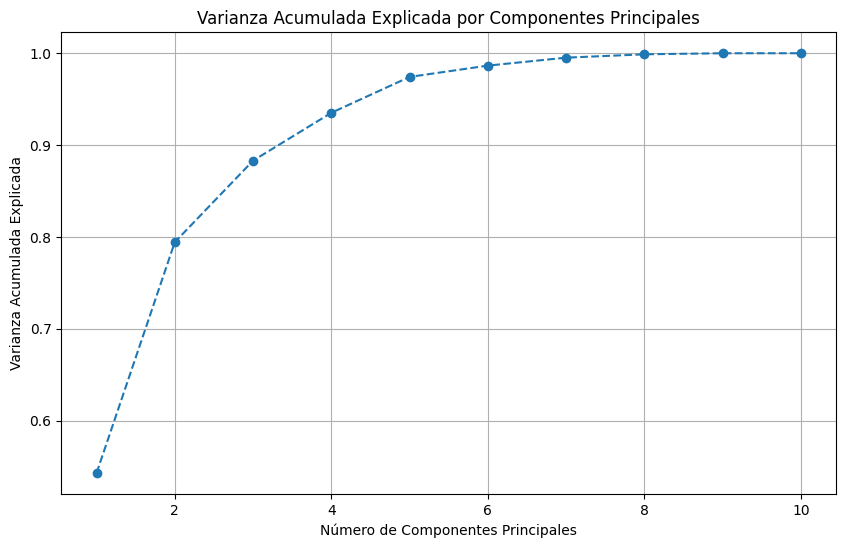

Número óptimo de componentes para el 95% de la varianza: 5
Dimensiones del conjunto de entrenamiento original: (455, 10)
Dimensiones del conjunto de entrenamiento después de PCA: (455, 5)

Predicciones del modelo:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 1 0]

Probabilidades de la clase 1 (maligno):
[8.20437569e-01 1.33154894e-01 7.71174483e-03 5.97340555e-03
 1.03410534e-02 2.37897492e-02 4.61041376e-03 4.61392367e-03
 2.09381747e-04 5.16297466e-04 4.27910445e-01 4.15314078e-01
 1.94896462e-04 4.24465691e-01 7.29713112e-01 9.45155007e-01
 1.51026117e-02 9.99887234e-01 9.99869251e-01 9.99996452e-01
 2.05560517e-01 9.85801487e-01 6.26591951e-02 3.73739538e-03
 9.99815550e-01 4.62022691e-04 4.63930771e-05 9.76499844e-01
 5.07215624e-03 9.93562478e-01 5.87342623e-04 9.90591145e-01
 9.26120965e-02 9.734041

In [126]:
# 'cancer_mean' DataFrame de entrada

# --- 1. Preparación y División de Datos ---
# Separación de características (X) y variable objetivo (y)
X = cancer_mean.drop(columns=['id','diagnosis'])
y = cancer_mean['diagnosis']

# Asignación de valores numéricos a la columna diagnosis (B=0 y M=1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# --- 2. Estandarización de Valores ---
# Estandarización de los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# --- 3. Análisis de Varianza con PCA para determinar n_components ---
# Inicializar PCA sin especificar el número de componentes
pca = PCA()
pca.fit(X_train_st)

# Calcular la varianza acumulada explicada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza para una visualización clara
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.grid(True)
plt.show()

# Encontrar el número de componentes para retener el 95% de la varianza
n_components_to_keep = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Número óptimo de componentes para el 95% de la varianza: {n_components_to_keep}")

# --- 4. Aplicar PCA con el número óptimo de componentes ---
# Se crea una nueva instancia de PCA con el número de componentes que encontramos
pca_final = PCA(n_components=n_components_to_keep)

# Se transforman los datos de entrenamiento y prueba
X_train_pca = pca_final.fit_transform(X_train_st)
X_test_pca = pca_final.transform(X_test_st)

print(f"Dimensiones del conjunto de entrenamiento original: {X_train_st.shape}")
print(f"Dimensiones del conjunto de entrenamiento después de PCA: {X_train_pca.shape}")

# --- 5. Entrenamiento y Predicción del Modelo ---
# Entrenar el modelo de regresión logística con los datos transformados por PCA
model_mean_lr = LogisticRegression(random_state=0)
model_mean_lr.fit(X_train_pca, y_train)

# Hacer predicciones en el conjunto de prueba transformado
predictions_mean_lr = model_mean_lr.predict(X_test_pca)
probabilities_mean_lr = model_mean_lr.predict_proba(X_test_pca)[:, 1]

print("\nPredicciones del modelo:")
print(predictions_mean_lr)
print("\nProbabilidades de la clase 1 (maligno):")
print(probabilities_mean_lr)

In [127]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de regresión logística Mean')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_mean_lr)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_mean_lr)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_mean_lr)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_mean_lr)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_mean_lr)))

Métricas de regresión logística Mean
Exactitud: 0.94
Precisión: 0.93
Recall: 0.91
F1: 0.92
ROC_AUC: 0.99


***Grupo SE***

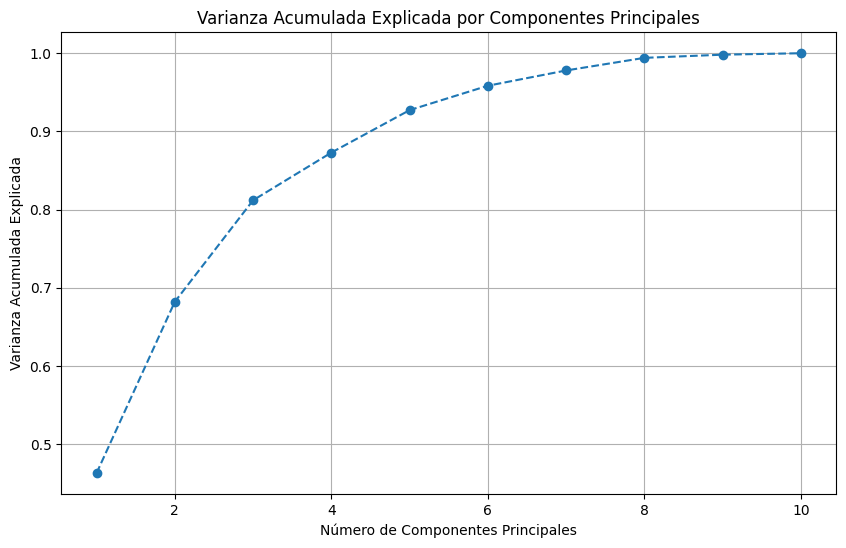

Número óptimo de componentes para el 95% de la varianza: 6
Dimensiones del conjunto de entrenamiento original: (455, 10)
Dimensiones del conjunto de entrenamiento después de PCA: (455, 6)

Predicciones del modelo:
[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 1 1 1]

Probabilidades de la clase 1 (maligno):
[0.63294306 0.05977174 0.22770005 0.2412741  0.023109   0.06751494
 0.05114468 0.02407887 0.00969848 0.00302853 0.75485094 0.33744348
 0.02074005 0.7469272  0.88112071 0.74307804 0.38458091 0.9273593
 0.91939651 0.99988611 0.66954298 0.44084336 0.09633589 0.09569393
 0.46916904 0.11370941 0.10701001 0.12850924 0.08646185 0.96572631
 0.09361103 0.94882956 0.35236907 0.6195542  0.031626   0.48466775
 0.23902935 0.98999775 0.22922188 0.85918623 0.37678473 0.53013402
 0.4708688  0.0447638  0.52741886 0.99997596

In [128]:
# 'cancer_se' DataFrame de entrada

# --- 1. Preparación y División de Datos ---
# Separación de características (X) y variable objetivo (y)
X = cancer_se.drop(columns=['id','diagnosis'])
y = cancer_se['diagnosis']

# Asignación de valores numéricos a la columna diagnosis (B=0 y M=1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# --- 2. Estandarización de Valores ---
# Estandarización de los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# --- 3. Análisis de Varianza con PCA para determinar n_components ---
# Inicializar PCA sin especificar el número de componentes
pca = PCA()
pca.fit(X_train_st)

# Calcular la varianza acumulada explicada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza para una visualización clara
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.grid(True)
plt.show()

# Encontrar el número de componentes para retener el 95% de la varianza
n_components_to_keep = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Número óptimo de componentes para el 95% de la varianza: {n_components_to_keep}")

# --- 4. Aplicar PCA con el número óptimo de componentes ---
# Se crea una nueva instancia de PCA con el número de componentes que encontramos
pca_final = PCA(n_components=n_components_to_keep)

# Se transforman los datos de entrenamiento y prueba
X_train_pca = pca_final.fit_transform(X_train_st)
X_test_pca = pca_final.transform(X_test_st)

print(f"Dimensiones del conjunto de entrenamiento original: {X_train_st.shape}")
print(f"Dimensiones del conjunto de entrenamiento después de PCA: {X_train_pca.shape}")

# --- 5. Entrenamiento y Predicción del Modelo ---
# Entrenar el modelo de regresión logística con los datos transformados por PCA
model_se_lr = LogisticRegression(random_state=0)
model_se_lr.fit(X_train_pca, y_train)

# Hacer predicciones en el conjunto de prueba transformado
predictions_se_lr = model_se_lr.predict(X_test_pca)
probabilities_se_lr = model_se_lr.predict_proba(X_test_pca)[:, 1]

print("\nPredicciones del modelo:")
print(predictions_se_lr)
print("\nProbabilidades de la clase 1 (maligno):")
print(probabilities_se_lr)

In [129]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de regresión logística SE')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_se_lr)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_se_lr)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_se_lr)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_se_lr)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_se_lr)))

Métricas de regresión logística SE
Exactitud: 0.80
Precisión: 0.77
Recall: 0.72
F1: 0.75
ROC_AUC: 0.93


***Grupo Worst***

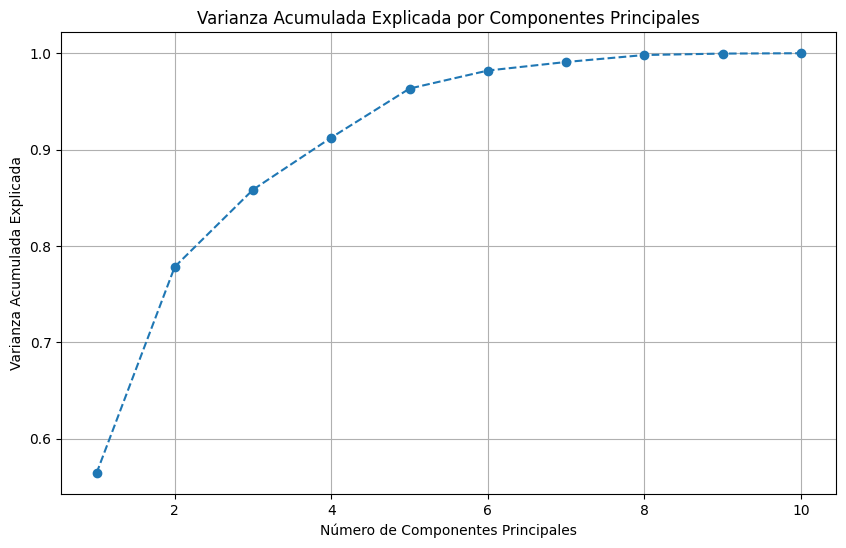

Número óptimo de componentes para el 95% de la varianza: 5
Dimensiones del conjunto de entrenamiento original: (455, 10)
Dimensiones del conjunto de entrenamiento después de PCA: (455, 5)

Predicciones del modelo:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]

Probabilidades de la clase 1 (maligno):
[9.63253515e-01 6.50140432e-02 3.01545638e-03 3.60682273e-02
 5.37454950e-04 7.33641664e-03 3.78278744e-03 4.24671549e-03
 6.18799581e-05 1.17549357e-04 1.23761547e-01 7.84094049e-02
 1.03732841e-04 3.78844425e-01 1.49273312e-01 9.25454946e-01
 1.00229978e-03 9.99969760e-01 9.97111310e-01 9.99988837e-01
 9.75821092e-01 9.41530980e-01 2.97630697e-02 4.92297148e-03
 9.97411800e-01 4.28291162e-03 1.75939490e-04 9.69383618e-01
 8.59079552e-03 9.99995974e-01 2.07623622e-04 9.99670693e-01
 1.75584774e-01 9.914496

In [130]:
# 'cancer_worst' DataFrame de entrada

# --- 1. Preparación y División de Datos ---
# Separación de características (X) y variable objetivo (y)
X = cancer_worst.drop(columns=['id','diagnosis'])
y = cancer_worst['diagnosis']

# Asignación de valores numéricos a la columna diagnosis (B=0 y M=1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# --- 2. Estandarización de Valores ---
# Estandarización de los datos de entrenamiento y prueba
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# --- 3. Análisis de Varianza con PCA para determinar n_components ---
# Inicializar PCA sin especificar el número de componentes
pca = PCA()
pca.fit(X_train_st)

# Calcular la varianza acumulada explicada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Graficar la varianza para una visualización clara
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.grid(True)
plt.show()

# Encontrar el número de componentes para retener el 95% de la varianza
n_components_to_keep = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Número óptimo de componentes para el 95% de la varianza: {n_components_to_keep}")

# --- 4. Aplicar PCA con el número óptimo de componentes ---
# Se crea una nueva instancia de PCA con el número de componentes que encontramos
pca_final = PCA(n_components=n_components_to_keep)

# Se transforman los datos de entrenamiento y prueba
X_train_pca = pca_final.fit_transform(X_train_st)
X_test_pca = pca_final.transform(X_test_st)

print(f"Dimensiones del conjunto de entrenamiento original: {X_train_st.shape}")
print(f"Dimensiones del conjunto de entrenamiento después de PCA: {X_train_pca.shape}")

# --- 5. Entrenamiento y Predicción del Modelo ---
# Entrenar el modelo de regresión logística con los datos transformados por PCA
model_worst_lr = LogisticRegression(random_state=0)
model_worst_lr.fit(X_train_pca, y_train)

# Hacer predicciones en el conjunto de prueba transformado
predictions_worst_lr = model_worst_lr.predict(X_test_pca)
probabilities_worst_lr = model_worst_lr.predict_proba(X_test_pca)[:, 1]

print("\nPredicciones del modelo:")
print(predictions_worst_lr)
print("\nProbabilidades de la clase 1 (maligno):")
print(probabilities_worst_lr)

In [131]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de regresión logística Worst')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_worst_lr)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_worst_lr)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_worst_lr)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_worst_lr)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_worst_lr)))

Métricas de regresión logística Worst
Exactitud: 0.98
Precisión: 0.98
Recall: 0.98
F1: 0.98
ROC_AUC: 1.00


**Modelo Arbol de Decisión (Decision Tree)**

***Grupo Mean***

In [132]:
# Visualización del grupo mean

print('Tamaño del dataset: ',cancer_mean.shape)
print(cancer_mean.head())

# Clasificación de la columna con la variable objetivo y el resto de las variables

X = cancer_mean.drop(columns=['id','diagnosis'])
y = cancer_mean['diagnosis']

# Asignación de valores númericos en la columna diagnosis B=0 y M=1

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos para entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state=0)

# Entrenamiento del modelo

model_mean_tree = DecisionTreeClassifier(random_state=0)
model_mean_tree.fit(X_train,y_train)

# Cálculo de predicciones y probabilidad  

predictions_mean_tree = model_mean_tree.predict(X_test)
probabilities_mean_tree = model_mean_tree.predict_proba(X_test)[:,1]

print(predictions_mean_tree)
print(probabilities_mean_tree)

Tamaño del dataset:  (569, 12)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimen

In [133]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de Arbol de Decisión Mean')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_mean_tree)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_mean_tree)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_mean_tree)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_mean_tree)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_mean_tree)))

Métricas de Arbol de Decisión Mean
Exactitud: 0.93
Precisión: 0.90
Recall: 0.94
F1: 0.92
ROC_AUC: 0.93


***Grupo SE***

In [134]:
# Visualización del grupo se

print('Tamaño del dataset: ',cancer_se.shape)
print(cancer_se.head())

# Clasificación de la columna con la variable objetivo y el resto de las variables

X = cancer_se.drop(columns=['id','diagnosis'])
y = cancer_se['diagnosis']

# Asignación de valores númericos en la columna diagnosis B=0 y M=1

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos para entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state=0)

# Entrenamiento del modelo

model_se_tree = DecisionTreeClassifier(random_state=0)
model_se_tree.fit(X_train,y_train)

# Cálculo de predicciones y probabilidad 

predictions_se_tree = model_se_tree.predict(X_test)
probabilities_se_tree = model_se_tree.predict_proba(X_test)[:,1]

print(predictions_se_tree)
print(probabilities_se_tree)

Tamaño del dataset:  (569, 12)
         id diagnosis  radius_se  texture_se  perimeter_se  area_se  \
0    842302         M     1.0950      0.9053         8.589   153.40   
1    842517         M     0.5435      0.7339         3.398    74.08   
2  84300903         M     0.7456      0.7869         4.585    94.03   
3  84348301         M     0.4956      1.1560         3.445    27.23   
4  84358402         M     0.7572      0.7813         5.438    94.44   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.006399         0.04904       0.05373            0.01587   
1       0.005225         0.01308       0.01860            0.01340   
2       0.006150         0.04006       0.03832            0.02058   
3       0.009110         0.07458       0.05661            0.01867   
4       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  
0      0.03003              0.006193  
1      0.01389              0.003532  
2      0.0

In [135]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de Arbol de Decisión SE')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_se_tree)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_se_tree)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_se_tree)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_se_tree)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_se_tree)))

Métricas de Arbol de Decisión SE
Exactitud: 0.81
Precisión: 0.75
Recall: 0.81
F1: 0.78
ROC_AUC: 0.81


***Grupo Worst***

In [136]:
# Visualización del grupo worst

print('Tamaño del dataset: ',cancer_worst.shape)
print(cancer_worst.head())

# Clasificación de la columna con la variable objetivo y el resto de las variables

X = cancer_worst.drop(columns=['id','diagnosis'])
y = cancer_worst['diagnosis']

# Asignación de valores númericos en la columna diagnosis B=0 y M=1

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos para entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state=0)

# Entrenamiento del modelo

model_worst_tree = DecisionTreeClassifier(random_state=0)
model_worst_tree.fit(X_train,y_train)

# Cálculo de predicciones y probabilidad 

predictions_worst_tree = model_worst_tree.predict(X_test)
probabilities_worst_tree = model_worst_tree.predict_proba(X_test)[:,1]

print(predictions_worst_tree)
print(probabilities_worst_tree)

Tamaño del dataset:  (569, 12)
         id diagnosis  radius_worst  texture_worst  perimeter_worst  \
0    842302         M         25.38          17.33           184.60   
1    842517         M         24.99          23.41           158.80   
2  84300903         M         23.57          25.53           152.50   
3  84348301         M         14.91          26.50            98.87   
4  84358402         M         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601         

In [137]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de Arbol de Decisión SE')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_worst_tree)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_worst_tree)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_worst_tree)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_worst_tree)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_worst_tree)))

Métricas de Arbol de Decisión SE
Exactitud: 0.96
Precisión: 0.92
Recall: 0.98
F1: 0.95
ROC_AUC: 0.96


**Modelo Random Forrest**

***Grupo Mean***

In [138]:
# Visualización del grupo mean

print('Tamaño del dataset: ',cancer_mean.shape)
print(cancer_mean.head())

# Clasificación de la columna con la variable objetivo y el resto de las variables

X = cancer_mean.drop(columns=['id','diagnosis'])
y = cancer_mean['diagnosis']

# Asignación de valores númericos en la columna diagnosis B=0 y M=1

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos para entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state=0)

# Entrenamiento del modelo

model_mean_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_mean_rf.fit(X_train,y_train)

# Cálculo de predicciones y probabilidad 

predictions_mean_rf = model_mean_rf.predict(X_test)
probabilities_mean_rf = model_mean_rf.predict_proba(X_test)[:,1]

print(predictions_mean_rf)
print(probabilities_mean_rf)

Tamaño del dataset:  (569, 12)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimen

In [139]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de Random Forrest Mean')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_mean_rf)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_mean_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_mean_rf)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_mean_rf)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_mean_rf)))

Métricas de Random Forrest Mean
Exactitud: 0.93
Precisión: 0.90
Recall: 0.94
F1: 0.92
ROC_AUC: 0.99


***Grupo SE***

In [140]:
# Visualización del grupo se

print('Tamaño del dataset: ',cancer_se.shape)
print(cancer_se.head())

# Clasificación de la columna con la variable objetivo y el resto de las variables

X = cancer_se.drop(columns=['id','diagnosis'])
y = cancer_se['diagnosis']

# Asignar en la columna disgnosis B=0 y M=1

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos para entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state=0)

# Entrenamiento del modelo

model_se_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_se_rf.fit(X_train,y_train)

# Cálculo de predicciones y probabilidad

predictions_se_rf = model_se_rf.predict(X_test)
probabilities_se_rf = model_se_rf.predict_proba(X_test)[:,1]

print(predictions_se_rf)
print(probabilities_se_rf)

Tamaño del dataset:  (569, 12)
         id diagnosis  radius_se  texture_se  perimeter_se  area_se  \
0    842302         M     1.0950      0.9053         8.589   153.40   
1    842517         M     0.5435      0.7339         3.398    74.08   
2  84300903         M     0.7456      0.7869         4.585    94.03   
3  84348301         M     0.4956      1.1560         3.445    27.23   
4  84358402         M     0.7572      0.7813         5.438    94.44   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.006399         0.04904       0.05373            0.01587   
1       0.005225         0.01308       0.01860            0.01340   
2       0.006150         0.04006       0.03832            0.02058   
3       0.009110         0.07458       0.05661            0.01867   
4       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  
0      0.03003              0.006193  
1      0.01389              0.003532  
2      0.0

In [141]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de Random Forrest SE')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_se_rf)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_se_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_se_rf)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_se_rf)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_se_rf)))

Métricas de Random Forrest SE
Exactitud: 0.90
Precisión: 0.86
Recall: 0.91
F1: 0.89
ROC_AUC: 0.95


***Grupo Worst***

In [142]:
# Visualización del grupo worst

print('Tamaño del dataset: ',cancer_worst.shape)
print(cancer_worst.head())

# Clasificación de la columna con la variable objetivo y el resto de las variables

X = cancer_worst.drop(columns=['id','diagnosis'])
y = cancer_worst['diagnosis']

# Asignación de valores númericos en la columna diagnosis B=0 y M=1

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos para entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state=0)

# Entrenamiento del modelo


model_worst_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_worst_rf.fit(X_train,y_train)

# Cálculo de predicciones y probabilidad

predictions_worst_rf = model_worst_rf.predict(X_test)
probabilities_worst_rf = model_worst_rf.predict_proba(X_test)[:,1]

print(predictions_worst_rf)
print(probabilities_worst_rf)

Tamaño del dataset:  (569, 12)
         id diagnosis  radius_worst  texture_worst  perimeter_worst  \
0    842302         M         25.38          17.33           184.60   
1    842517         M         24.99          23.41           158.80   
2  84300903         M         23.57          25.53           152.50   
3  84348301         M         14.91          26.50            98.87   
4  84358402         M         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601         

In [143]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de Random Forrest Worst')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_worst_rf)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_worst_rf)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_worst_rf)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_worst_rf)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_worst_rf)))

Métricas de Random Forrest Worst
Exactitud: 0.96
Precisión: 0.96
Recall: 0.96
F1: 0.96
ROC_AUC: 1.00


**Gradient Boosting**

***Mean***

In [144]:
# Visualización del grupo mean

print('Tamaño del dataset: ',cancer_mean.shape)
print(cancer_mean.head())

# Clasificación de la columna con la variable objetivo y el resto de las variables

X = cancer_mean.drop(columns=['id','diagnosis'])
y = cancer_mean['diagnosis']

# Asignación de valores númericos en la columna diagnosis B=0 y M=1

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos para entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state=0)

# Entrenamiento del modelo

model_mean_gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
model_mean_gb.fit(X_train,y_train)

# Cálculo de predicciones y probabilidad 

predictions_mean_gb = model_mean_gb.predict(X_test)
probabilities_mean_gb = model_mean_gb.predict_proba(X_test)[:,1]

print(predictions_mean_gb)
print(probabilities_mean_gb)

Tamaño del dataset:  (569, 12)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimen

In [145]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de Gradient Boosting Mean')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_mean_gb)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_mean_gb)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_mean_gb)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_mean_gb)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_mean_gb)))

Métricas de Gradient Boosting Mean
Exactitud: 0.96
Precisión: 0.94
Recall: 0.96
F1: 0.95
ROC_AUC: 0.99


***Grupo SE***

In [146]:
# Visualización del grupo se

print('Tamaño del dataset: ',cancer_se.shape)
print(cancer_se.head())

# Clasificación de la columna con la variable objetivo y el resto de las variables

X = cancer_se.drop(columns=['id','diagnosis'])
y = cancer_se['diagnosis']

# Asignación de valores númericos en la columna diagnosis B=0 y M=1

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos para entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state=0)

# Entrenamiento del modelo

model_se_gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
model_se_gb.fit(X_train,y_train)

# Cálculo de predicciones y probabilidad

predictions_se_gb = model_se_gb.predict(X_test)
probabilities_se_gb = model_se_gb.predict_proba(X_test)[:,1]

print(predictions_se_gb)
print(probabilities_se_gb)

Tamaño del dataset:  (569, 12)
         id diagnosis  radius_se  texture_se  perimeter_se  area_se  \
0    842302         M     1.0950      0.9053         8.589   153.40   
1    842517         M     0.5435      0.7339         3.398    74.08   
2  84300903         M     0.7456      0.7869         4.585    94.03   
3  84348301         M     0.4956      1.1560         3.445    27.23   
4  84358402         M     0.7572      0.7813         5.438    94.44   

   smoothness_se  compactness_se  concavity_se  concave points_se  \
0       0.006399         0.04904       0.05373            0.01587   
1       0.005225         0.01308       0.01860            0.01340   
2       0.006150         0.04006       0.03832            0.02058   
3       0.009110         0.07458       0.05661            0.01867   
4       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  
0      0.03003              0.006193  
1      0.01389              0.003532  
2      0.0

In [147]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de Gradient Boosting SE')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_se_gb)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_se_gb)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_se_gb)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_se_gb)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_se_gb)))

Métricas de Gradient Boosting SE
Exactitud: 0.91
Precisión: 0.88
Recall: 0.91
F1: 0.90
ROC_AUC: 0.97


***Grupo Worst***

In [148]:
# Visualización del grupo worst

print('Tamaño del dataset: ',cancer_worst.shape)
print(cancer_worst.head())

# Clasificación de la columna con la variable objetivo y el resto de las variables

X = cancer_worst.drop(columns=['id','diagnosis'])
y = cancer_worst['diagnosis']

# Asignación de valores númericos en la columna diagnosis B=0 y M=1

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# División de los datos para entrenamiento y evaluación

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size= 0.2, random_state=0)

# Entrenamiento del modelo

model_worst_gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
model_worst_gb.fit(X_train,y_train)

# Cálculo de predicciones y probabilidad 

predictions_worst_gb = model_worst_gb.predict(X_test)
probabilities_worst_gb = model_worst_gb.predict_proba(X_test)[:,1]

print(predictions_worst_gb)
print(probabilities_worst_gb)

Tamaño del dataset:  (569, 12)
         id diagnosis  radius_worst  texture_worst  perimeter_worst  \
0    842302         M         25.38          17.33           184.60   
1    842517         M         24.99          23.41           158.80   
2  84300903         M         23.57          25.53           152.50   
3  84348301         M         14.91          26.50            98.87   
4  84358402         M         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601         

In [149]:
# Métricas para la predicción y probabilidad resultante
print('Métricas de Gradient Boosting SE')
print('Exactitud: {:.2f}'.format(accuracy_score(y_test, predictions_worst_gb)))
print('Precisión: {:.2f}'.format(precision_score(y_test, predictions_worst_gb)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions_worst_gb)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions_worst_gb)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, probabilities_worst_gb)))

Métricas de Gradient Boosting SE
Exactitud: 0.96
Precisión: 0.94
Recall: 0.96
F1: 0.95
ROC_AUC: 1.00


In [150]:
accuracy_mean_lr = accuracy_score(y_test, predictions_mean_lr)
precision_mean_lr = precision_score(y_test, predictions_mean_lr)
recall_mean_lr = recall_score(y_test, predictions_mean_lr)
f1_mean_lr = f1_score(y_test, predictions_mean_lr)
roc_auc_mean_lr = roc_auc_score(y_test, probabilities_mean_lr)

accuracy_se_lr = accuracy_score(y_test, predictions_se_lr)
precision_se_lr = precision_score(y_test, predictions_se_lr)
recall_se_lr = recall_score(y_test, predictions_se_lr)
f1_se_lr = f1_score(y_test, predictions_se_lr)
roc_auc_se_lr = roc_auc_score(y_test, probabilities_se_lr)

accuracy_worst_lr = accuracy_score(y_test, predictions_worst_lr)
precision_worst_lr = precision_score(y_test, predictions_worst_lr)
recall_worst_lr = recall_score(y_test, predictions_worst_lr)
f1_worst_lr = f1_score(y_test, predictions_worst_lr)
roc_auc_worst_lr = roc_auc_score(y_test, probabilities_worst_lr)


mean_metrics_lr = {
    'accuracy':accuracy_mean_lr,
    'precision':precision_mean_lr,
    'recall':recall_mean_lr,
    'f1':f1_mean_lr,
    'roc_auc':roc_auc_mean_lr}


se_metrics_lr = {
    'accuracy':accuracy_se_lr,
    'precision':precision_se_lr,
    'recall':recall_se_lr,
    'f1':f1_se_lr,
    'roc_auc':roc_auc_se_lr}


worst_metrics_lr = {
    'accuracy':accuracy_worst_lr,
    'precision':precision_worst_lr,
    'recall':recall_worst_lr,
    'f1':f1_worst_lr,
    'roc_auc':roc_auc_worst_lr}

df_resultados_lr = pd.DataFrame.from_dict({
    'Mean':mean_metrics_lr,
    'SE':se_metrics_lr,
    'Worst':worst_metrics_lr
},orient='columns')

df_resultados_lr.index.name = 'Metrica Logistic Regression'



**Creación de Dataframe de resultados**

In [151]:
accuracy_mean_tree = accuracy_score(y_test, predictions_mean_tree)
precision_mean_tree = precision_score(y_test, predictions_mean_tree)
recall_mean_tree = recall_score(y_test, predictions_mean_tree)
f1_mean_tree = f1_score(y_test, predictions_mean_tree)
roc_auc_mean_tree = roc_auc_score(y_test, probabilities_mean_tree)

accuracy_se_tree = accuracy_score(y_test, predictions_se_tree)
precision_se_tree = precision_score(y_test, predictions_se_tree)
recall_se_tree = recall_score(y_test, predictions_se_tree)
f1_se_tree = f1_score(y_test, predictions_se_tree)
roc_auc_se_tree = roc_auc_score(y_test, probabilities_se_tree)

accuracy_worst_tree = accuracy_score(y_test, predictions_worst_tree)
precision_worst_tree = precision_score(y_test, predictions_worst_tree)
recall_worst_tree = recall_score(y_test, predictions_worst_tree)
f1_worst_tree = f1_score(y_test, predictions_worst_tree)
roc_auc_worst_tree = roc_auc_score(y_test, probabilities_worst_tree)


mean_metrics_tree = {
    'accuracy':accuracy_mean_tree,
    'precision':precision_mean_tree,
    'recall':recall_mean_tree,
    'f1':f1_mean_tree,
    'roc_auc':roc_auc_mean_tree}


se_metrics_tree = {
    'accuracy':accuracy_se_tree,
    'precision':precision_se_tree,
    'recall':recall_se_tree,
    'f1':f1_se_tree,
    'roc_auc':roc_auc_se_tree}


worst_metrics_tree = {
    'accuracy':accuracy_worst_tree,
    'precision':precision_worst_tree,
    'recall':recall_worst_tree,
    'f1':f1_worst_tree,
    'roc_auc':roc_auc_worst_tree}

df_resultados_tree = pd.DataFrame.from_dict({
    'Mean':mean_metrics_tree,
    'SE':se_metrics_tree,
    'Worst':worst_metrics_tree
},orient='columns')

df_resultados_tree.index.name = 'Metrica Decision Tree'


In [152]:
accuracy_mean_rf = accuracy_score(y_test, predictions_mean_rf)
precision_mean_rf = precision_score(y_test, predictions_mean_rf)
recall_mean_rf = recall_score(y_test, predictions_mean_rf)
f1_mean_rf = f1_score(y_test, predictions_mean_rf)
roc_auc_mean_rf = roc_auc_score(y_test, probabilities_mean_rf)

accuracy_se_rf = accuracy_score(y_test, predictions_se_rf)
precision_se_rf = precision_score(y_test, predictions_se_rf)
recall_se_rf = recall_score(y_test, predictions_se_rf)
f1_se_rf = f1_score(y_test, predictions_se_rf)
roc_auc_se_rf = roc_auc_score(y_test, probabilities_se_rf)

accuracy_worst_rf = accuracy_score(y_test, predictions_worst_rf)
precision_worst_rf = precision_score(y_test, predictions_worst_rf)
recall_worst_rf = recall_score(y_test, predictions_worst_rf)
f1_worst_rf = f1_score(y_test, predictions_worst_rf)
roc_auc_worst_rf = roc_auc_score(y_test, probabilities_worst_rf)


mean_metrics_rf = {
    'accuracy':accuracy_mean_rf,
    'precision':precision_mean_rf,
    'recall':recall_mean_rf,
    'f1':f1_mean_rf,
    'roc_auc':roc_auc_mean_rf}


se_metrics_rf = {
    'accuracy':accuracy_se_rf,
    'precision':precision_se_rf,
    'recall':recall_se_rf,
    'f1':f1_se_rf,
    'roc_auc':roc_auc_se_rf}


worst_metrics_rf = {
    'accuracy':accuracy_worst_rf,
    'precision':precision_worst_rf,
    'recall':recall_worst_rf,
    'f1':f1_worst_rf,
    'roc_auc':roc_auc_worst_rf}

df_resultados_rf = pd.DataFrame.from_dict({
    'Mean':mean_metrics_rf,
    'SE':se_metrics_rf,
    'Worst':worst_metrics_rf
},orient='columns')

df_resultados_rf.index.name = 'Metrica Random Forrest'

In [153]:
accuracy_mean_gb = accuracy_score(y_test, predictions_mean_gb)
precision_mean_gb = precision_score(y_test, predictions_mean_gb)
recall_mean_gb = recall_score(y_test, predictions_mean_gb)
f1_mean_gb = f1_score(y_test, predictions_mean_gb)
roc_auc_mean_gb = roc_auc_score(y_test, probabilities_mean_gb)

accuracy_se_gb = accuracy_score(y_test, predictions_se_gb)
precision_se_gb = precision_score(y_test, predictions_se_gb)
recall_se_gb = recall_score(y_test, predictions_se_gb)
f1_se_gb = f1_score(y_test, predictions_se_gb)
roc_auc_se_gb = roc_auc_score(y_test, probabilities_se_gb)

accuracy_worst_gb = accuracy_score(y_test, predictions_worst_gb)
precision_worst_gb = precision_score(y_test, predictions_worst_gb)
recall_worst_gb = recall_score(y_test, predictions_worst_gb)
f1_worst_gb = f1_score(y_test, predictions_worst_gb)
roc_auc_worst_gb = roc_auc_score(y_test, probabilities_worst_gb)



mean_metrics_gb = {
    'accuracy':accuracy_mean_gb,
    'precision':precision_mean_gb,
    'recall':recall_mean_gb,
    'f1':f1_mean_gb,
    'roc_auc':roc_auc_mean_gb}


se_metrics_gb = {
    'accuracy':accuracy_se_gb,
    'precision':precision_se_gb,
    'recall':recall_se_gb,
    'f1':f1_se_gb,
    'roc_auc':roc_auc_se_gb}


worst_metrics_gb = {
    'accuracy':accuracy_worst_gb,
    'precision':precision_worst_gb,
    'recall':recall_worst_gb,
    'f1':f1_worst_gb,
    'roc_auc':roc_auc_worst_gb}

df_resultados_gb = pd.DataFrame.from_dict({
    'Mean':mean_metrics_gb,
    'SE':se_metrics_gb,
    'Worst':worst_metrics_gb
},orient='columns')

df_resultados_gb.index.name = 'Metrica Gradient Boosting'

print(df_resultados_lr)
print(df_resultados_tree)
print(df_resultados_rf)
print(df_resultados_gb)


                                 Mean        SE     Worst
Metrica Logistic Regression                              
accuracy                     0.938596  0.798246  0.982456
precision                    0.934783  0.772727  0.978723
recall                       0.914894  0.723404  0.978723
f1                           0.924731  0.747253  0.978723
roc_auc                      0.987615  0.927914  0.999682
                           Mean        SE     Worst
Metrica Decision Tree                              
accuracy               0.929825  0.807018  0.956140
precision              0.897959  0.745098  0.920000
recall                 0.936170  0.808511  0.978723
f1                     0.916667  0.775510  0.948454
roc_auc                0.930772  0.807240  0.959511
                            Mean        SE     Worst
Metrica Random Forrest                              
accuracy                0.929825  0.903509  0.964912
precision               0.897959  0.860000  0.957447
recall            

**Creación de archivos con los resultados de cada modelo para dashboard**

In [154]:
df_resultados_lr.to_csv('resultados_lr.csv')
df_resultados_tree.to_csv('resultados_tree.csv')
df_resultados_rf.to_csv('resultados_rf.csv')
df_resultados_gb.to_csv('resultados_gb.csv')

In [157]:
markdown_table_lr = tabulate(df_resultados_lr, headers='keys', tablefmt='pipe')
markdown_table_tree = tabulate(df_resultados_tree, headers='keys', tablefmt='pipe')
markdown_table_rf = tabulate(df_resultados_rf, headers='keys', tablefmt='pipe')
markdown_table_gb = tabulate(df_resultados_gb, headers='keys', tablefmt='pipe')
# Imprimir la tabla para copiarla
print(markdown_table_lr)
print(markdown_table_tree)
print(markdown_table_rf)
print(markdown_table_gb)

| Metrica Logistic Regression   |     Mean |       SE |    Worst |
|:------------------------------|---------:|---------:|---------:|
| accuracy                      | 0.938596 | 0.798246 | 0.982456 |
| precision                     | 0.934783 | 0.772727 | 0.978723 |
| recall                        | 0.914894 | 0.723404 | 0.978723 |
| f1                            | 0.924731 | 0.747253 | 0.978723 |
| roc_auc                       | 0.987615 | 0.927914 | 0.999682 |
| Metrica Decision Tree   |     Mean |       SE |    Worst |
|:------------------------|---------:|---------:|---------:|
| accuracy                | 0.929825 | 0.807018 | 0.95614  |
| precision               | 0.897959 | 0.745098 | 0.92     |
| recall                  | 0.93617  | 0.808511 | 0.978723 |
| f1                      | 0.916667 | 0.77551  | 0.948454 |
| roc_auc                 | 0.930772 | 0.80724  | 0.959511 |
| Metrica Random Forrest   |     Mean |       SE |    Worst |
|:-------------------------|---------:|---